## 📖 Introduction
Our team has been working on a redesign of the landing page for an early-stage startup in Germany. We believe that a new design will increase the number of people who click through and join the startup's site. 

We have been testing the changes for a few weeks and this notebook is devoted to measuring their impact. We will try to quantify the change in the number of signed-up visitors and determine whether it is random or not.

## 💾 The data
We have assembled the following info:
- "treatment" - "yes" if the user saw the new version of the landing page, no otherwise.
- "new_images" - "yes" if the page used a new set of images, no otherwise.
- "converted" - 1 if the user joined the site, 0 otherwise.

The control group is those users with "no" in both columns: the old version with the old set of images.

The first step, as in any datascience project, is to load necessary tools (packages), which is done below.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Now we are ready to load the data and explore it.

In [ ]:
df = pd.read_csv('./data/redesign.csv')
df.head()

,treatment,new_images,converted
0,yes,yes,0
1,yes,yes,0
2,yes,yes,0
3,yes,no,0
4,no,yes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40484 entries, 0 to 40483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   treatment   40484 non-null  object
 1   new_images  40484 non-null  object
 2   converted   40484 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 949.0+ KB


The info above shows that there are not any misssing observations in the data and we have 40484 of them in total. Let's observe the number of visitors exposed to old and new design. The table below shows that the numbers are the same. So the data is not overbalanced.

In [ ]:
all_df = df['treatment'].value_counts()
all_df.name = 'Visitors'
all_df.to_frame()

,Visitors
no,20242
yes,20242


As we know from the data description, there are 4 groups. One is the control group (visitors of the site without any changes) and the others are treatment groups. The table below shows the data distribution by those groups. Again we see that we don't have overbalancing issue here: each group contains the same amount of visitors.

In [ ]:
group_df = df.groupby(['treatment', 'new_images'])['treatment'].count()
group_df.name = 'Visitors'
group_df.to_frame()

Visitors
treatment new_images          
no        no             10121
          yes            10121
yes       no             10121
          yes            10121

Now we can move on and derive the conversion rates for each of the four groups. The table below shows that the rate is the lowest for the control group. Moreover the highest conversion rate is observed for redesigned site with old images.

In [ ]:
conversion_rates = 100 * df.groupby(['treatment', 'new_images'])['converted'].mean()
conversion_rates.name = 'Conversion rate, %'
conversion_rates.to_frame()

Conversion rate, %
treatment new_images                    
no        no                   10.710404
          yes                  11.253829
yes       no                   12.004743
          yes                  11.372394

So, are the results random ? We will try to answer to this question by separating the cases. Specifically, we compare the control group to the 3 treatment groups.

## Control vs treatment (visitors of redesigned site with old images)

Null hypothesiis is that the observed difference in the conversion rates is a product of a random chance. Namely, there is no difference at all. The null hypothesis will be the same for the rest of the cases too. Considering the null hypothesis we can generate simulated datasets and calculate p-value. P-value shows fraction of the simulated datasets for which we observe the conversion difference at least as extreme as in real data.
<br> The histogram below shows the distribution of the conversion rates' differences in %. The red line represents the real observed difference. Corresponding p-value is reported above the chart. So p-value is about 0.5. This means that we can't reject the null hypothesis at 1, 5, or 10 % significance levels.

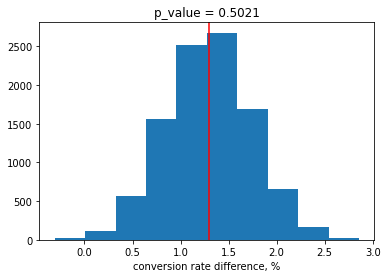

In [ ]:
diff_list = []
for i in range(10000):
	temp_df = df[df['new_images']=='no'].sample(frac=1, replace=True)
	conversion_control = 100*temp_df[temp_df['treatment']=='no']['converted'].mean()
	conversion_treatment = 100*temp_df[temp_df['treatment']=='yes']['converted'].mean()
	temp_diff = conversion_treatment - conversion_control
	diff_list.append(temp_diff)
    
temp_df = df[df['new_images']=='no']
conversion_control = 100*temp_df[temp_df['treatment']=='no']['converted'].mean()
conversion_treatment = 100*temp_df[temp_df['treatment']=='yes']['converted'].mean()
real_diff = conversion_treatment - conversion_control

p_value = sum([1 if diff>=real_diff else 0 for diff in diff_list]) / len(diff_list)

plt.hist(diff_list)
plt.axvline(real_diff, color='red')
plt.xlabel('conversion rate difference, %')
plt.title(f"p_value = {p_value}")
plt.show()

## Control vs treatment (visitors of unchanged site with new images)
As we mentioned above the hypothesis is the same. We also follow almost the same steps to analyze the results. Again the histogram below shows the distribution of the conversion rates' differences in %. The red line represents the real observed difference. Corresponding p-value is reported above the chart. So p-value is about 0.5. This means that we can't reject the null hypothesis at 1, 5, or 10 % significance levels.

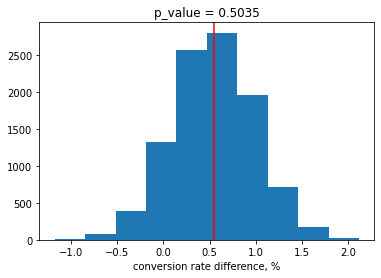

In [ ]:
diff_list = []
for i in range(10000):
	temp_df = df[df['treatment']=='no'].sample(frac=1, replace=True)
	conversion_control = 100*temp_df[temp_df['new_images']=='no']['converted'].mean()
	conversion_treatment = 100*temp_df[temp_df['new_images']=='yes']['converted'].mean()
	temp_diff = conversion_treatment - conversion_control
	diff_list.append(temp_diff)
    
temp_df = df[df['treatment']=='no']
conversion_control = 100*temp_df[temp_df['new_images']=='no']['converted'].mean()
conversion_treatment = 100*temp_df[temp_df['new_images']=='yes']['converted'].mean()
real_diff = conversion_treatment - conversion_control

p_value = sum([1 if diff>=real_diff else 0 for diff in diff_list]) / len(diff_list)

plt.hist(diff_list)
plt.axvline(real_diff, color='red')
plt.xlabel('conversion rate difference, %')
plt.title(f"p_value = {p_value}")
plt.show()

## Control vs treatment (visitors of redesigned site with new images)
Again the histogram below shows the distribution of the conversion rates' differences in %. The red line represents the real observed difference. Corresponding p-value is reported above the chart. So p-value is about 0.5. This means that we can't reject the null hypothesis at 1, 5, or 10 % significance levels.

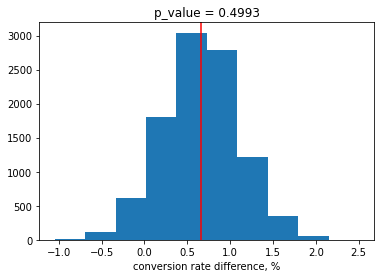

In [ ]:
df_control = df[(df['treatment']=='no') & (df['new_images']=='no')]
df_treatment = df[(df['treatment']=='yes') & (df['new_images']=='yes')]
df_total = pd.concat([df_control, df_treatment], axis=0)

diff_list = []
for i in range(10000):
	temp_df = df_total.sample(frac=1, replace=True)
	conversion_control = 100*temp_df[(temp_df['treatment']=='no') &
                                     (temp_df['new_images']=='no')]['converted'].mean()
	conversion_treatment = 100*temp_df[(temp_df['treatment']=='yes') &
                                       (temp_df['new_images']=='yes')]['converted'].mean()
	temp_diff = conversion_treatment - conversion_control
	diff_list.append(temp_diff)
    
conversion_control = 100*df_total[(df_total['treatment']=='no') & 
                                  (df_total['new_images']=='no')]['converted'].mean()
conversion_treatment = 100*df_total[(df_total['treatment']=='yes') & 
                                    (df_total['new_images']=='yes')]['converted'].mean()
real_diff = conversion_treatment - conversion_control

p_value = sum([1 if diff>=real_diff else 0 for diff in diff_list]) / len(diff_list)

plt.hist(diff_list)
plt.axvline(real_diff, color='red')
plt.xlabel('conversion rate difference, %')
plt.title(f"p_value = {p_value}")
plt.show()

## Conclusion
After testing the null hypothesis for all the cases, we can conclude that the observed differences have happened by chance. Therefore it is better to keep the site as it is or incorporate and test some new ideas.